# Notebook to visualize training transforms for SELMA3D data

## Setup

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
import tifffile as tiff
import torch

from monai.transforms import (
    CastToTyped,
    Compose,
    EnsureChannelFirstd,
    MapTransform,
    RandAffined,
    RandFlipd,
    RandGaussianNoised,
    RandGaussianSmoothd,
    RandRotate90d,
    RandScaleIntensityd,
    RandShiftIntensityd,
    ScaleIntensityRangePercentilesd,
    ThresholdIntensityd,
    ToTensord
)
from monai.data import Dataset, DataLoader


In [2]:
# get functions from other files
sys.path.append('/home/ads4015/ssl_project/preprocess_patches/src')
from selma3d_visualization_functions import ClampIntensityd, LoadTiffd, get_train_transforms, get_val_transforms, get_load_transforms


In [3]:
# # transform to clamp image intensity between 0-1
# class ClampIntensityd(MapTransform):
#     def __init__(self, keys, minv=0.0, maxv=1.0):
#         super().__init__(keys)
#         self.minv = minv
#         self.maxv = maxv

#     def __call__(self, data):
#         d = dict(data)
#         for key in self.keys:
#             d[key] = np.clip(d[key], self.minv, self.maxv)
#         return d


In [4]:
# # function to get training transforms
# def get_train_transforms():
#     return Compose([

#         # load
#         LoadTiffd(keys=['image']),
#         CastToTyped(keys=['image'], dtype=np.float32),

#         # normalize based on input percentiles
#         ScaleIntensityRangePercentilesd(keys=['image'], lower=1, upper=99, b_min=0.0, b_max=1.0, clip=True),

#         # spatial augmentations
#         RandFlipd(keys=['image'], spatial_axis=[0, 1, 2], prob=0.2),
#         RandRotate90d(keys=['image'], prob=0.2, max_k=3),
#         RandAffined(keys=['image'], rotate_range=(0.1, 0.1, 0.1), scale_range=(0.1, 0.1, 0.1), prob=0.2),

#         # intensity augmentations
#         RandGaussianNoised(keys=['image'], prob=0.2, mean=0.0, std=0.02),
#         RandGaussianSmoothd(keys=['image'], prob=0.2),
#         RandScaleIntensityd(keys=['image'], factors=0.2, prob=0.2),
#         RandShiftIntensityd(keys=['image'], offsets=0.2, prob=0.2),
#         ClampIntensityd(keys=["image"], minv=0.0, maxv=1.0),

#         # convert to tensor
#         ToTensord(keys=['image'])
#     ])


In [5]:
# set seed for reproducibility
random.seed(100)


In [6]:
# define paths to data
data_root = '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches'
save_root = '/midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp'
os.makedirs(save_root, exist_ok=True)

# define variables
data_types = ['ab_plaque', 'cfos', 'nucleus', 'vessel_eb', 'vessel_wga']
train_target = 200
val_target = 50
patch_targets = {'train': train_target, 'val': val_target}
train_ratio = 0.8 # 80% train, 20% val


## Functions

In [7]:
# define transforms
train_transforms = get_train_transforms()
val_transforms = get_val_transforms()
load_transforms = get_load_transforms()


In [8]:
# visualization function
def visualize_patches(original, augmented, title):

    # get center slice
    center_z = original.shape[1] // 2

    # create figure
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(title, fontsize=12)

    # plot original
    axs[0].imshow(original[0, center_z], cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    # plot augmented
    axs[1].imshow(augmented[0, center_z], cmap='gray')
    axs[1].set_title('Augmented')
    axs[1].axis('off')
    
    # format and show plot
    plt.tight_layout()
    plt.show()


In [9]:
# function to plot number of samples from each image
def plot_patch_counts(patch_counts, title):

    # create plot
    fig, axs = plt.subplots(figsize=(12, 6))

    # create lists for labels, counts, and colors
    labels, counts, colors = [], [], []

    # define color mapping
    color_map = {
        'ab_plaque': 'tab:blue',
        'cfos': 'tab:orange',
        'nucleus': 'tab:green',
        'vessel_eb': 'tab:red',
        'vessel_wga': 'tab:purple'
    }

    # loop through samples in each dtype and add data to lists
    for dtype in sorted(patch_counts):
        for sample in sorted(patch_counts[dtype]):
            labels.append(f'{dtype} {sample}')
            counts.append(patch_counts[dtype][sample])
            colors.append(color_map.get(dtype, 'gray'))

    # create plot
    axs.bar(labels, counts, color=colors)
    axs.set_title(title)
    axs.set_ylabel('Num patches')
    axs.set_xlabel('Sample')
    plt.xticks(rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()
    


## Get data


TRAIN SAMPLES BY DATATYPE
ab_plaque: sample1, sample3, sample4
cfos: sample1, sample10, sample12, sample13, sample14, sample15, sample16, sample17, sample18, sample2, sample5, sample6, sample7, sample9
nucleus: sample1, sample2, sample4
vessel_eb: sample1, sample2, sample3, sample4, sample6, sample8, sample9
vessel_wga: sample1, sample2, sample3, sample4, sample7, sample8, sample9

VAL SAMPLES BY DATATYPE
ab_plaque: sample2
cfos: sample11, sample3, sample4, sample8
nucleus: sample3
vessel_eb: sample5, sample7
vessel_wga: sample5, sample6
[TRAIN] Saved patch 1: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/vessel_eb_sample6_C01_p1491_aug.tiff


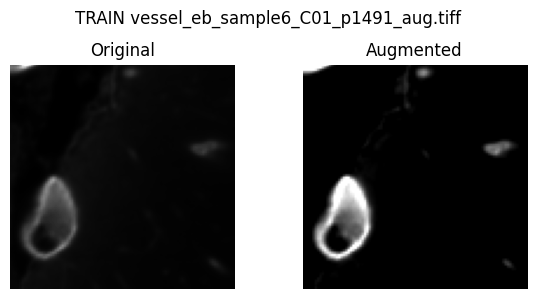

[TRAIN] Saved patch 2: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/nucleus_sample1_C01_p47799_aug.tiff


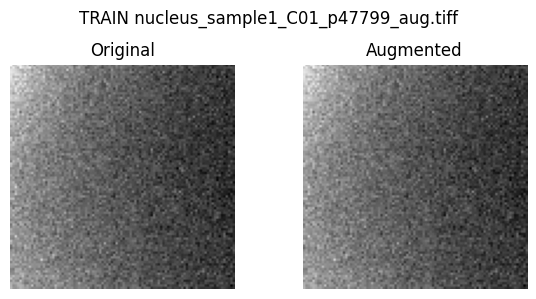

[TRAIN] Saved patch 3: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/ab_plaque_sample3_C01_p11195_aug.tiff


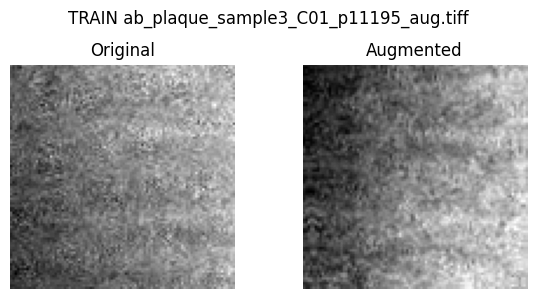

[TRAIN] Saved patch 4: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/nucleus_sample2_C01_p24135_aug.tiff
[TRAIN] Saved patch 5: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/ab_plaque_sample1_C01_p11825_aug.tiff
[TRAIN] Saved patch 6: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/cfos_sample17_C01_p1652_aug.tiff
[TRAIN] Saved patch 7: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/cfos_sample15_C01_p1187_aug.tiff
[TRAIN] Saved patch 8: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/ab_plaque_sample3_C01_p3585_aug.tiff
[TRAIN] Saved patch 9: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/cfos_sample12_C01_p6121_aug.tiff
[TRAIN] Saved patch 10: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/nucleus_sample4_C01_p39135_aug.tiff
[TRAIN] Saved patch 11: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/train/nucleus_sample2_C01_p1604_aug.ti

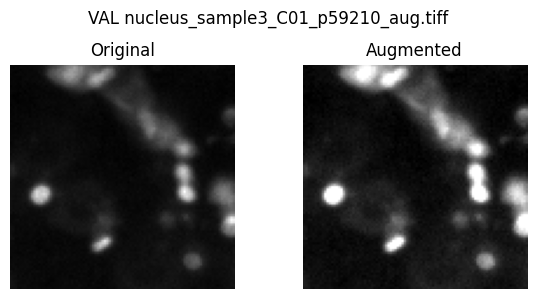

[VAL] Saved patch 2: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p3435_aug.tiff


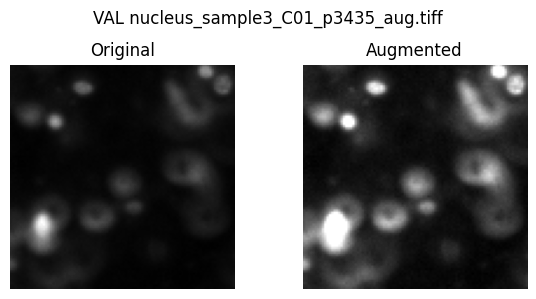

[VAL] Saved patch 3: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/cfos_sample3_C01_p5600_aug.tiff


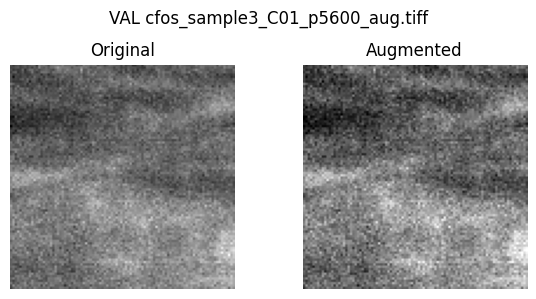

[VAL] Saved patch 4: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p2653_aug.tiff
[VAL] Saved patch 5: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p2829_aug.tiff
[VAL] Saved patch 6: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/cfos_sample4_C01_p7006_aug.tiff
[VAL] Saved patch 7: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p49646_aug.tiff
[VAL] Saved patch 8: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p64625_aug.tiff
[VAL] Saved patch 9: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p20358_aug.tiff
[VAL] Saved patch 10: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p31746_aug.tiff
[VAL] Saved patch 11: /midtier/paetzollab/scratch/ads4015/data_selma3d/lsm_fm_temp/val/nucleus_sample3_C01_p64189_aug.tiff
[VAL] Saved patch 12: /midti

In [10]:
# patch selection and saving
patch_paths_by_phase = {'train': [], 'val': []}
sample_assignments = {'train': {}, 'val': {}}

# # create lists to track image set assignment
# train_image_list = []
# val_image_list = []

# # determine desired total image count
# train_target = 200
# val_target = 50
# per_dtype_train = train_target // len(data_types)
# per_dtype_val = val_target // len(data_types)
# print(f'Train per dtype: {per_dtype_train}; val per dtype: {per_dtype_val}')

# loop through each datatype and split/save patches
for dtype in data_types:
    folder = os.path.join(data_root, dtype)
    all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.tiff')]

    # group by sample to prevent overlap
    samples_dict = {}
    for f in all_files:
        sample = os.path.basename(f).split('_C')[0].split(dtype + '_')[-1]
        samples_dict.setdefault(sample, []).append(f)

    sample_keys = list(samples_dict.keys())
    random.shuffle(sample_keys)
    split_idx = int(train_ratio * len(sample_keys))
    train_keys = sample_keys[:split_idx]
    val_keys = sample_keys[split_idx:]

    sample_assignments['train'][dtype] = train_keys
    sample_assignments['val'][dtype] = val_keys

    for phase, sample_keys_phase in zip(['train', 'val'], [train_keys, val_keys]):
        for s in sample_keys_phase:
            patch_paths_by_phase[phase].extend(samples_dict[s])

for phase in ['train', 'val']:
    print(f'\n{phase.upper()} SAMPLES BY DATATYPE')
    for dtype in data_types:
        samples = sample_assignments[phase].get(dtype, [])
        print(f'{dtype}: {", ".join(sorted(samples))}')


for phase in ['train', 'val']:
    output_dir = os.path.join(save_root, phase)
    os.makedirs(output_dir, exist_ok=True)
    all_patches = patch_paths_by_phase[phase]
    random.shuffle(all_patches)

    transforms = train_transforms if phase == 'train' else val_transforms
    target = patch_targets[phase]
    saved_count = 0

    for i, patch_path in enumerate(all_patches):
        if saved_count >= target:
            break

        try:
            d = {'image': patch_path}
            original = load_transforms(d)['image']
            augmented = transforms(d)['image']
            filename = os.path.basename(patch_path).replace('.tiff', '_aug.tiff')
            save_path = os.path.join(output_dir, filename)
            tiff.imwrite(save_path, augmented.numpy(), dtype=np.float32)
            print(f'[{phase.upper()}] Saved patch {saved_count+1}: {save_path}')
            saved_count += 1

            if saved_count <= 3: 
                visualize_patches(original.numpy(), augmented.numpy(), f'{phase.upper()} {filename}')

        except Exception as e:
            print(f'Failed to process {patch_path}: {e}')

print('All patches saved')





























#     # create lists and counters
#     all_samples = list(samples_dict.keys())
#     random.shuffle(all_samples)
#     train_samples = []
#     val_samples = []
#     train_patch_count = 0
#     val_patch_count = 0


#     # shuffle and fill train/val samples while tracking number of patches
#     for s in all_samples:
#         patch_count = len(samples_dict[s])
#         if s not in train_samples and s not in val_samples:
#             if train_patch_count + patch_count <= per_dtype_train:
#                 train_samples.append(s)
#                 train_patch_count += patch_count
#             elif val_patch_count + patch_count <= per_dtype_val:
#                 val_samples.append(s)
#                 val_patch_count += patch_count
#         if train_patch_count >= per_dtype_train and val_patch_count >= per_dtype_val:
#             break

#     # add files to lists for tracking
#     train_files = [f for s in train_samples for f in samples_dict[s]]
#     val_files = [f for s in val_samples for f in samples_dict[s]]
#     train_image_list.extend(train_files)
#     val_image_list.extend(val_files)

#     # save patches
#     for phase, files, transforms, patch_cap  in zip(['train', 'val'], 
#                                                     [train_files, val_files], 
#                                                     [train_transforms, val_transforms],
#                                                     [train_target // len(data_types), val_target // len(data_types)]):

#         # create output directory
#         out_dir = os.path.join(save_root, phase)
#         os.makedirs(out_dir, exist_ok=True)
#         random.shuffle(files) # ensure randomness

#         saved_count = 0

#         # loop through files
#         for i, f in enumerate(files):

#             if saved_count >= patch_cap:
#                 break

#             # load and transform
#             d = {'image': f}
#             original = load_transforms(d)['image']
#             augmented = transforms(d)['image']

#             # save augmented patch
#             print(f'[INFO] {phase} patch min: {augmented.min():.5f}, max: {augmented.max():.5f}')
#             filename = os.path.splitext(os.path.basename(f))[0] + '_aug.tiff'
#             save_path = os.path.join(out_dir, filename)
#             tiff.imwrite(save_path, augmented.numpy(), dtype=np.float32)
#             print(f'Saved {phase} patch: {save_path}')
#             saved_count += 1

#             # visualize 3 examples per datatype per phase
#             if i < 3:
#                 visualize_patches(original.numpy(), augmented.numpy(), f'{dtype} - {phase}')
            


#     # samples += [{'image': f, 'label': dtype} for f in selected_files]

# # indicate cell completion
# print('All patches saved.')

# # 



In [11]:
# create dicts to hold samples by dtype
train_samples_by_dtype = {}
val_samples_by_dtype = {}

# create dicts to hold counts of each sample by dtype
train_patch_counts = {}
val_patch_counts = {}

# function to print list of samples
def print_list_samples(image_list, samples_dtype_dict, patch_counts_dict, title):
    for f in image_list:
        dtype = os.path.basename(os.path.dirname(f))
        sample = os.path.basename(f).split('_C')[0].split(dtype + '_')[-1]
        samples_dtype_dict.setdefault(dtype, set()).add(sample)
        patch_counts_dict.setdefault(dtype, {}).setdefault(sample, 0)
        patch_counts_dict[dtype][sample] += 1
    print(title)
    for dtype, samples in samples_dtype_dict.items():
        for sample in sorted(samples):
            print(f'{dtype} - {sample}')

# train
print_list_samples(train_image_list, train_samples_by_dtype, train_patch_counts, 'Train images')

# val
print_list_samples(val_image_list, val_samples_by_dtype, val_patch_counts, 'Val images')

# plot
plot_patch_counts(train_patch_counts, 'Train patch counts per sample')
plot_patch_counts(val_patch_counts, 'Val patch counts per sample')


NameError: name 'train_image_list' is not defined

## Visualize

In [ ]:
# # visualize original image and transforms
# def visualize_patch(original, augmented, label, idx, filepath):

#     # define center slice
#     center_z = original.shape[1] // 2

#     # get filename from filepath
#     filename = os.path.splitext(os.path.basename(filepath))[0]

#     # create plot
#     fig, axs = plt.subplots(1, 2, figsize=(6, 3))
#     fig.suptitle(filename, fontsize=14)

#     # plot original
#     axs[0].imshow(original[0, center_z], cmap='gray')
#     axs[0].set_title(f'Original')
#     axs[1].imshow(augmented[0, center_z], cmap='gray')
#     axs[1].set_title('Augmented')

#     # format and show figure
#     for ax in axs: ax.axis('off')
#     plt.tight_layout()
#     # plt.savefig(f'preview_{label}_{idx}.png') # uncomment this line to save sample images to file
#     plt.show()
    

## Apply

In [ ]:
# # loop through images and apply transformations
# for i, samp in enumerate(samples):

#     original = load_transforms(samp)['image']
#     print(f'[DEBUG] Original shape: {original.shape}, dtype: {original.dtype}, file: {samp["image"]}')

#     augmented = train_transforms(samp)['image']
#     print(f'[DEBUG] Augmented shape: {augmented.shape}, dtype: {augmented.dtype}')
#     print(f'Augmented min: {augmented.min()}, max: {augmented.max()}')

    
#     visualize_patch(original.numpy(), augmented.numpy(), samp['label'], i, samp['image'])


In [ ]:
## UP TO HERE - rebalance dataset